# Dominos Pizza  Project - DElivary Performance

## Problem Statement 
- The objective of this project is to evaluate the delivery performance of a Diminos pizza store by analyzing whether 95% of customer orders are delivered within the promised 31-minute service level agreement (SLA), and to identify operational insights that help maintain service quality and business profitability.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


## Basic Checks

In [19]:
df.shape

(15000, 3)

In [20]:
df.size

45000

In [21]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [23]:
df.value_counts()

order_id  order_placed_at      order_delivered_at        
1538110   2023-03-27 23:58:20  2023-03-28 00:13:42.499311    1
1523111   2023-03-01 00:00:59  2023-03-01 00:18:07.443132    1
1523112   2023-03-01 00:03:59  2023-03-01 00:19:34.925241    1
1523113   2023-03-01 00:07:22  2023-03-01 00:22:28.291385    1
1523114   2023-03-01 00:07:47  2023-03-01 00:46:19.019399    1
                                                            ..
1523123   2023-03-01 00:25:44  2023-03-01 00:41:35.374214    1
1523122   2023-03-01 00:22:11  2023-03-01 00:37:33.109414    1
1523121   2023-03-01 00:21:45  2023-03-01 00:36:48.814636    1
1523120   2023-03-01 00:15:34  2023-03-01 00:31:53.026195    1
1523119   2023-03-01 00:15:20  2023-03-01 00:30:28.234367    1
Name: count, Length: 15000, dtype: int64

In [24]:
df.tail()


,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [25]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

### Clean Column names

In [33]:
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

## Convert columns to datetime format

In [35]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

## Feature Engineering

In [37]:
df['Delivery_Duration'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

df['Delivery_Duration'].head()

0    17.140719
1    15.598754
2    15.104856
3    38.533657
4    16.176984
Name: Delivery_Duration, dtype: float64

In [40]:
df=df[df['Delivery_Duration']>0]
df.head()

,order_id,order_placed_at,order_delivered_at,Delivery_Duration
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


## Outliers

In [42]:
Q1 = df['Delivery_Duration'].quantile(0.25)
Q3 = df['Delivery_Duration'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


12.267573633333328
20.286913266666673


In [43]:
outliers = df[(df['Delivery_Duration'] < lower_bound) | 
              (df['Delivery_Duration'] > upper_bound)]

outliers.shape


(1734, 4)

In [44]:
outliers['Delivery_Duration'].describe()


count    1734.000000
mean       54.260001
std       280.589605
min        20.289057
25%        22.019948
50%        25.539237
75%        34.375420
max      7299.831375
Name: Delivery_Duration, dtype: float64

### Box Plot 

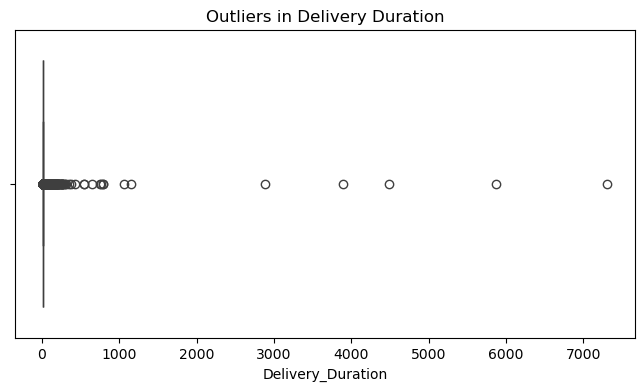

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Delivery_Duration'])
plt.title("Outliers in Delivery Duration")
plt.show()


#### there are extreme outliers in this dataset, i.e some of the orders are delivaring in extreme delay hours

## 95th Percentile

In [46]:
p95thPercentile=np.percentile(df['Delivery_Duration'],95)
round(p95thPercentile,2)

np.float64(27.26)

In [49]:
if p95thPercentile < 31:
    print("PASS: Store meets Diminos SLA requirement")
else:
    print("FAIL: Store violates Diminos SLA requirement")

PASS: Store meets Diminos SLA requirement


#### 95% of orders are delivered within 27.26 minutes, which meets the SLA requirement

### Delivery Time Dmistribution

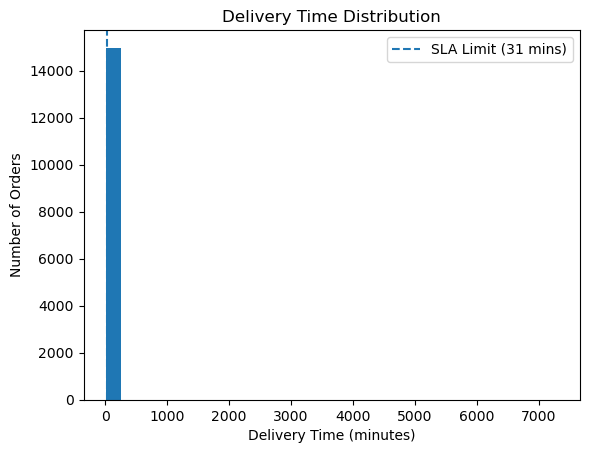

In [53]:
plt.figure()
plt.hist(df['Delivery_Duration'], bins=30)
plt.axvline(31, linestyle='--', label='SLA Limit (31 mins)')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Delivery Time Distribution")
plt.legend()
plt.show()

## Percentage of Late Orders

In [56]:
late_orders = df[df['Delivery_Duration'] > 31]
late_percentage = (len(late_orders) / len(df)) * 100
round(late_percentage, 2)

3.71

## Hour-wise SLA Analysis

In [63]:
df['order_hour'] = df['order_placed_at'].dt.hour
hourly_p95 = df.groupby('order_hour')['Delivery_Duration'].quantile(0.95).round(2)
hourly_p95

order_hour
0     28.87
1     32.10
2     26.85
3     25.62
4     26.26
5     23.92
6     26.49
7     27.15
8     27.21
9     25.71
10    26.76
11    33.41
12    24.33
13    29.71
14    27.89
15    24.93
16    32.44
17    28.26
18    24.10
19    26.80
20    28.24
21    28.93
22    24.61
23    26.94
Name: Delivery_Duration, dtype: float64

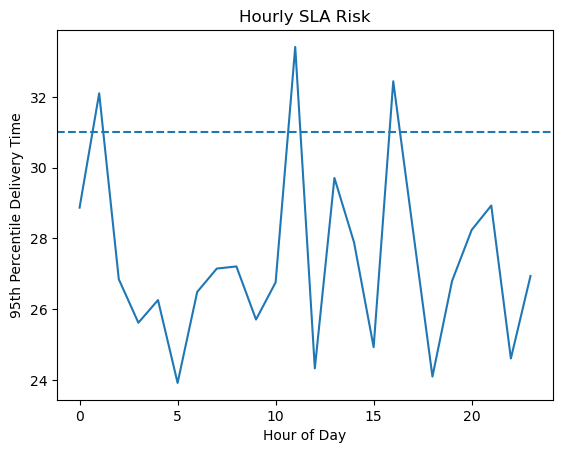

In [64]:

plt.figure()
hourly_p95.plot()
plt.axhline(31, linestyle='--')
plt.xlabel("Hour of Day")
plt.ylabel("95th Percentile Delivery Time")
plt.title("Hourly SLA Risk")
plt.show()

## Day-wise SLA Analysis

In [62]:
df['order_day'] = df['order_placed_at'].dt.day_name()
daywise_p95 = df.groupby('order_day')['Delivery_Duration'].quantile(0.95)
daywise_p95

order_day
Friday       26.331713
Monday       28.737349
Saturday     26.935257
Sunday       26.517667
Thursday     26.534242
Tuesday      29.397539
Wednesday    26.442186
Name: Delivery_Duration, dtype: float64

### Business Summary

In [66]:
summary = {
"Total Orders": len(df),
"95th Percentile Delivery Time (mins)": round(p95thPercentile, 2),
"Late Orders %": round(late_percentage, 2)
}
summary

{'Total Orders': 15000,
 '95th Percentile Delivery Time (mins)': np.float64(27.26),
 'Late Orders %': 3.71}

## Recommendation

In [70]:
if p95thPercentile > 31:
    print("Immediate Actions Required:")
    print("- Increase delivery staff during high-risk hours")
    print("- Improve kitchen preparation time")
    print("- Optimize delivery routes")
else:
    print("SLA met, but continuous monitoring is recommended.")

SLA met, but continuous monitoring is recommended.


## Insights

- The 95th percentile delivery time directly determines franchise risk
- Analysis pinpoints high-risk hours and days
- Enables data-backed operational decisions
- Fully aligned with Diminos SL